In [36]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import Imputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

from xgboost import XGBRegressor

# Setup

In [154]:
# read csv
data = pd.read_csv('./train.csv')
# predictors
X = data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object']).dropna(axis=1)
y = data.SalePrice
# split test and train
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.25)

### Training using XGBRegressor

In [155]:
# train model
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05)
model.fit(Xtr, ytr)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [156]:
# predict 
predictions = model.predict(Xts)
# mae
mean_absolute_error(predictions, yts)

15219.563325007775

# Partial Dependency Plots

/Users/chico/.pyenv/versions/3.6.3/envs/dc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


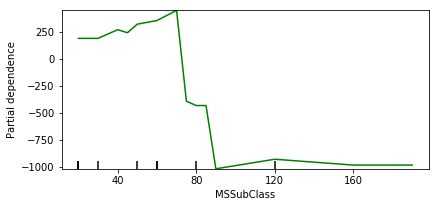

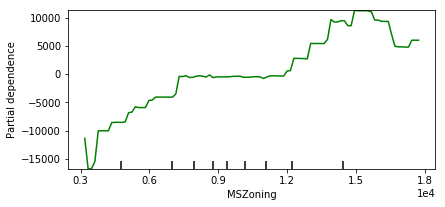

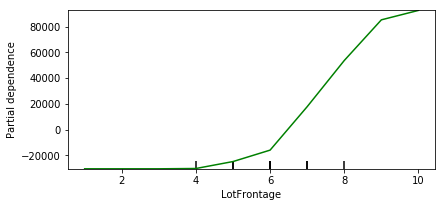

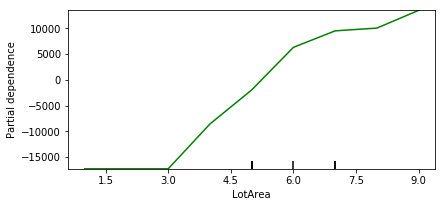

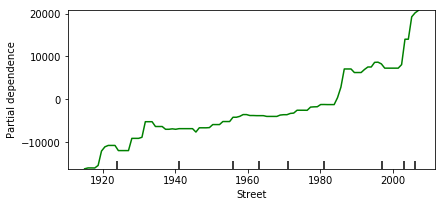

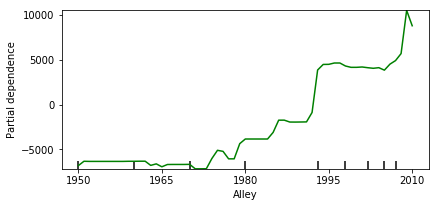

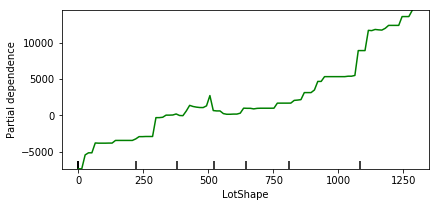

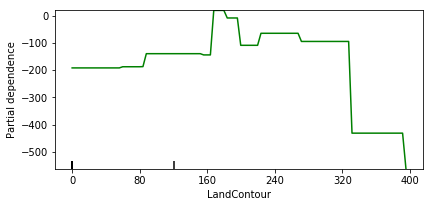

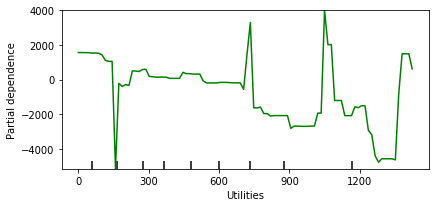

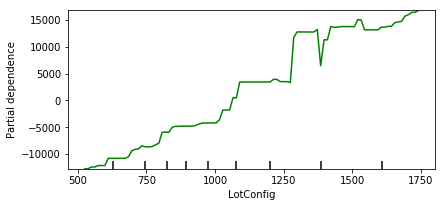

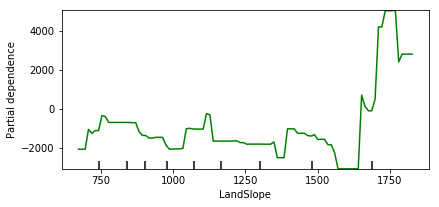

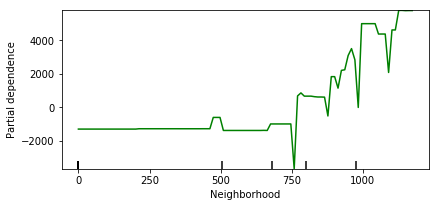

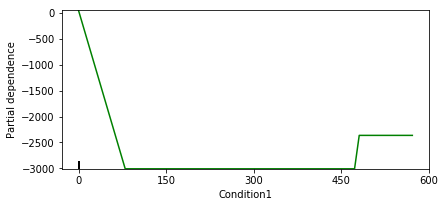

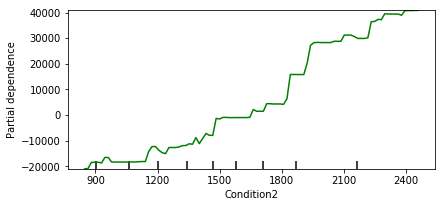

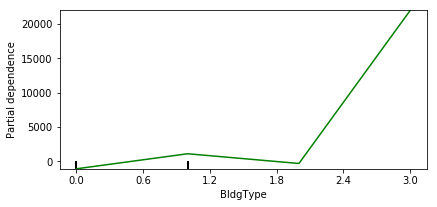

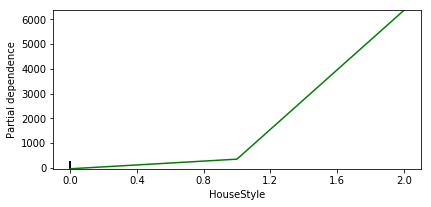

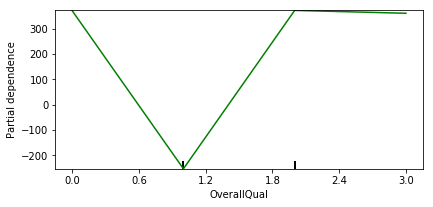

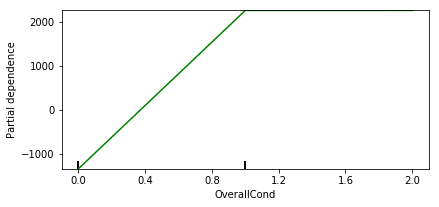

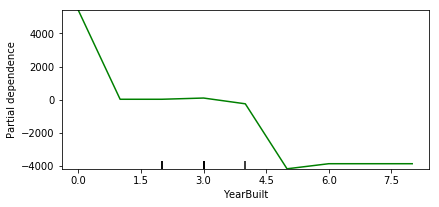

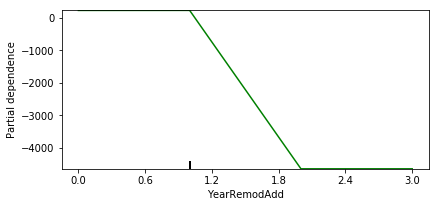

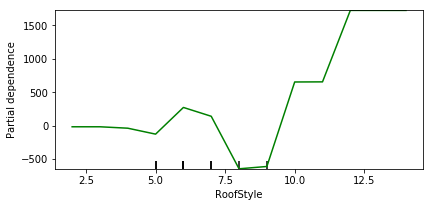

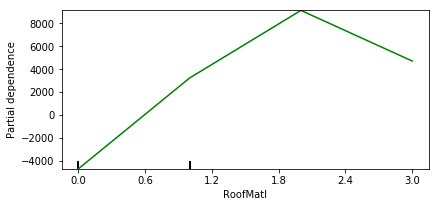

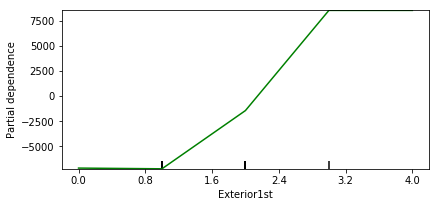

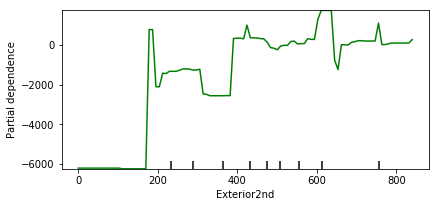

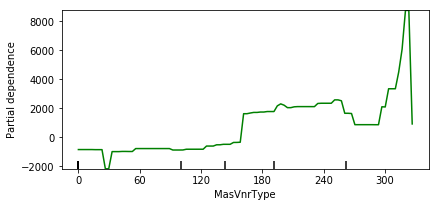

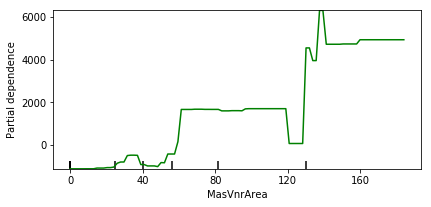

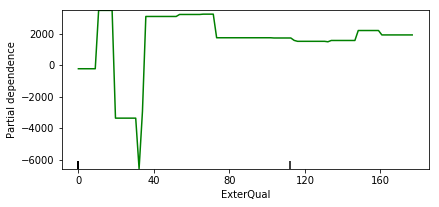

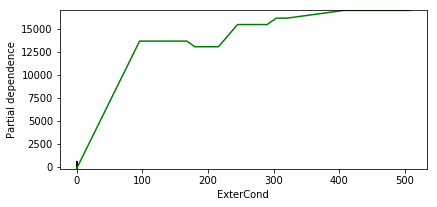

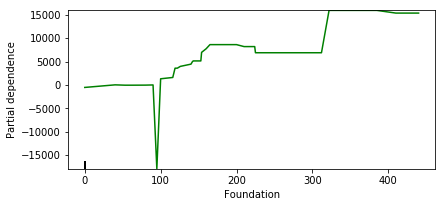

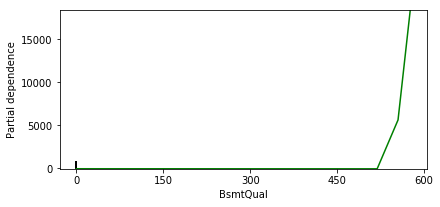

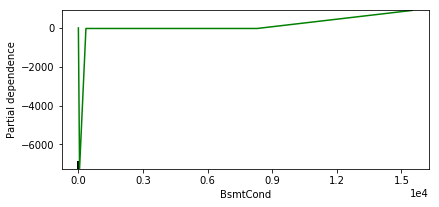

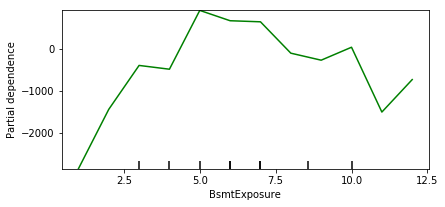

In [158]:
for feature in range(1, 33):
    plot_partial_dependence(model, features=[feature], feature_names=data.columns, X=Xtr, grid_resolution=100)